# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [63]:
# Import warnings
import warnings


In [6]:
# Import the libraries you will be using for analysis



In [64]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)


numpy version: 1.26.4
pandas version: 2.1.4
matplotlib version: 3.8.0
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [65]:
# Try loading one file
df = pd.read_parquet(r"/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/trip_records/2023-1.parquet")
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1          2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2          2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3          1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4          2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5          2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6          2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7          2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8          2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9          2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   
10         2  2023-01-01 00:53:01   2023-01-01 01:01:45              1.0   
11         1  2023-01-01 00:43:37   2023-01-01 01:17:18              4.0   
12         2  2023-01-01 00:34:44   2023-01-01 01:04:25              1.0   
13         2  2023-01-01 00:09:29   2023-01-01 00:29:23              2.0   
14         2  2023-01-01 00:33:53   2023-01-01 00:49:15              1.0   
15         2  2023-01-01 00:13:04   2023-01-01 00:22:10              1.0   
16         2  2023-01-01 00:45:11   2023-01-01 01:07:39              1.0   
17         1  2023-01-01 00:04:33   2023-01-01 00:19:22              1.0   
18         1  2023-01-01 00:03:36   2023-01-01 00:09:36              3.0   
19         1  2023-01-01 00:15:23   2023-01-01 00:29:41              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.97         1.0                  N           161           141   
1            1.10         1.0                  N            43           237   
2            2.51         1.0                  N            48           238   
3            1.90         1.0                  N           138             7   
4            1.43         1.0                  N           107            79   
5            1.84         1.0                  N           161           137   
6            1.66         1.0                  N           239           143   
7           11.70         1.0                  N           142           200   
8            2.95         1.0                  N           164           236   
9            3.01         1.0                  N           141           107   
10           1.80         1.0                  N           234            68   
11           7.30         1.0                  N            79           264   
12           3.23         1.0                  N           164           143   
13          11.43         1.0                  N           138            33   
14           2.95         1.0                  N            33            61   
15           1.52         1.0                  N            79           186   
16           2.23         1.0                  N            90            48   
17           4.50         1.0                  N           113           255   
18           1.20         1.0                  N           237           239   
19           2.50         1.0                  N           143           229   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0              2          9.3   1.00      0.5        0.00           0.0   
1              1          7.9   1.00      0.5        4.00           0.0   
2              1         14.9   1.00      0.5       15.00           0.0   
3              1         12.1   7.25      0.5        0.00           0.0   
4              1         11.4   1.00      0.5        3.28           0.0   
5              1         12.8   1.00      0.5       10.00           0.0   
6              1         12.1   1.00      0.5        3.42           0.0   
7              1         45.7   1.00      0.5       10.74           3.0   
8              1         17.7   1.00      0.5      

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

We need every date and their respective hours sample data for sampling . so that we will get every day  and hours data for analysis. 

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [66]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Reading file: {file_name}")
        # Reading the current file
        df_month = pd.read_parquet(file_path)
        sampled_data = pd.DataFrame()
        # Filter data for a specific date (Y) and hour (X) and Year
        
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour
        df_month['year'] = df_month['tpep_pickup_datetime'].dt.year
        
        df_month =  df_month[(df_month['year'] == 2023)]
        
        for date in  df_month['date'].unique():
            for hour in df_month['hour'].unique():
                hour_data = df_month[(df_month['date'] == date) & (df_month['hour'] == hour) & (df_month['year'] == 2023)]
                if len(hour_data) > 0:
                    sample = hour_data.sample(frac = 0.05, random_state = 42)
                    sampled_data = pd.concat([sampled_data,sample]) 

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df.shape        


Reading file: 2023-12.parquet
Reading file: 2023-6.parquet
Reading file: 2023-7.parquet
Reading file: 2023-5.parquet
Reading file: 2023-11.parquet
Reading file: 2023-10.parquet
Reading file: 2023-4.parquet
Reading file: 2023-1.parquet
Reading file: 2023-8.parquet
Reading file: 2023-9.parquet
Reading file: 2023-2.parquet
Reading file: 2023-3.parquet


(1896399, 23)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [67]:
# Store the df in csv/parquet
# df.to_parquet('')
final_sampled_data =  df.sample(frac = 0.016, random_state = 42)
df = final_sampled_data
df.to_parquet('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Sampled_NYC_Taxi_Data.parquet')
print(" file saved successfully!")
df.shape


 file saved successfully!


(30342, 23)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [68]:
# Load the new data file
file_path = '/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Sampled_NYC_Taxi_Data.parquet'
df = pd.read_parquet(file_path)


In [17]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1543958         2  2023-03-15 13:19:09   2023-03-15 13:48:16              1.0   
801630          2  2023-12-07 21:32:41   2023-12-07 22:02:50              1.0   
486897          2  2023-01-06 19:24:49   2023-01-06 19:36:11              1.0   
2898309         2  2023-11-28 13:54:06   2023-11-28 14:13:44              1.0   
3231324         1  2023-06-08 03:48:12   2023-06-08 03:56:39              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1543958           4.38         1.0                  N           230   
801630            3.67         1.0                  N           114   
486897            1.16         1.0                  N           229   
2898309           2.05         1.0                  N           237   
3231324           0.00         NaN               None           142   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
1543958            13             2  ...        0.00           0.0   
801630            224             1  ...        6.22           0.0   
486897            142             1  ...        3.58           0.0   
2898309           164             1  ...        4.34           0.0   
3231324           249             0  ...        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1543958                    1.0         32.90                   2.5   
801630                     1.0         37.32                   2.5   
486897                     1.0         21.48                   2.5   
2898309                    1.0         26.04                   2.5   
3231324                    1.0         16.49                   NaN   

         Airport_fee        date  hour  year airport_fee  
1543958          0.0  2023-03-15    13  2023         NaN  
801630           0.0  2023-12-07    21  2023         NaN  
486897           NaN  2023-01-06    19  2023         0.0  
2898309          0.0  2023-11-28    13  2023         NaN  
3231324          NaN  2023-06-08     3  2023         NaN  

[5 rows x 23 columns]

In [69]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30342 entries, 1543958 to 119838
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               30342 non-null  int64         
 1   tpep_pickup_datetime   30342 non-null  datetime64[us]
 2   tpep_dropoff_datetime  30342 non-null  datetime64[us]
 3   passenger_count        29340 non-null  float64       
 4   trip_distance          30342 non-null  float64       
 5   RatecodeID             29340 non-null  float64       
 6   store_and_fwd_flag     29340 non-null  object        
 7   PULocationID           30342 non-null  int64         
 8   DOLocationID           30342 non-null  int64         
 9   payment_type           30342 non-null  int64         
 10  fare_amount            30342 non-null  float64       
 11  extra                  30342 non-null  float64       
 12  mta_tax                30342 non-null  float64       
 13 

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [70]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             2  2023-03-15 13:19:09   2023-03-15 13:48:16              1.0   
1             2  2023-12-07 21:32:41   2023-12-07 22:02:50              1.0   
2             2  2023-01-06 19:24:49   2023-01-06 19:36:11              1.0   
3             2  2023-11-28 13:54:06   2023-11-28 14:13:44              1.0   
4             1  2023-06-08 03:48:12   2023-06-08 03:56:39              NaN   
...         ...                  ...                   ...              ...   
30337         1  2023-02-03 11:40:17   2023-02-03 12:12:39              2.0   
30338         2  2023-11-01 23:07:27   2023-11-01 23:27:02              1.0   
30339         2  2023-04-09 12:33:20   2023-04-09 12:39:46              4.0   
30340         1  2023-06-15 14:36:13   2023-06-15 14:55:04              1.0   
30341         2  2023-05-02 10:41:04   2023-05-02 10:50:39              2.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               4.38         1.0                  N           230   
1               3.67         1.0                  N           114   
2               1.16         1.0                  N           229   
3               2.05         1.0                  N           237   
4               0.00         NaN               None           142   
...              ...         ...                ...           ...   
30337          16.20         2.0                  N           132   
30338           4.40         1.0                  N            68   
30339           0.77         1.0                  N            43   
30340           2.20         1.0                  N           262   
30341           0.83         1.0                  N           141   

       DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                13             2  ...        0.00          0.00   
1               224             1  ...        6.22          0.00   
2               142             1  ...        3.58          0.00   
3               164             1  ...        4.34          0.00   
4               249             0  ...        0.00          0.00   
...             ...           ...  ...         ...           ...   
30337           164             2  ...        0.00          6.55   
30338           262             1  ...        5.52          0.00   
30339           237             1  ...        2.38          0.00   
30340           161             1  ...        4.30          0.00   
30341           237             2  ...        0.00          0.00   

       improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                        1.0         32.90                   2.5         0.00   
1                        1.0         37.32                   2.5         0.00   
2                        1.0         21.48                   2.5          NaN   
3                        1.0         26.04                   2.5         0.00   
4                        1.0         16.49                   NaN          NaN   
...                      ...           ...                   ...          ...   
30337                    1.0         81.80                   2.5         1.25   
30338                    1.0         33.12                   2.5         0.00   
30339                    1.0         14.28                   2.5         0.00   
30340                    1.0         26.00                   2.5         0.00   
30341                    1.0         14.00                   2.5         0.00   

             date  hour  year airport_fee  
0      2023-03-15    13  2023         NaN  
1      2023-12-07    21  2023         NaN  
2      2023-01-06    19  2023         0.0  
3      2023-11-28    13  2023         NaN  
4      2023-06-08     3  2023         NaN  
...           ...   ...   ...         ...  
30337  2023-02-03    11  2023         NaN  
30338  2023-11-01    23  2023         NaN  
30339  2023-04-09    12  2023         NaN  

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [71]:
# Rename the columns
df.rename(columns={'airport_fee': 'airport_fee1', 'Airport_fee': 'airport_fee2'}, inplace=True)

# Fill null values with 0
df['airport_fee1'] = df['airport_fee1'].fillna(0)
df['airport_fee2'] = df['airport_fee2'].fillna(0)

# Combine the two columns
df['airport_fee'] = df['airport_fee1'] + df['airport_fee2']

# Drop the original columns
df = df.drop(columns=['airport_fee1', 'airport_fee2'])

# Save the updated DataFrame
df.to_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data.csv', index=False)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [72]:
# check where values of fare amount are negative
# We have monetary columns fare_amount,tip_amount,extra,tolls_amount,total_amount,airport_fee and check  wether 
#Observation: fare_amount column is not having any negative value,extra column is having 1 negative value,
#total_amount is having 8 negative values, other columns are not having any negative .Removed those rows withe the monetary columns 
# which are having negative values.

df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data.csv')
monetary_columns_to_check = ['fare_amount', 'tip_amount','extra','total_amount', 'trip_distance','airport_fee']

for col in monetary_columns_to_check:
    negative_val_before = (df[col]<0).sum()
    df = df[df[col] >= 0]
    negative_val_after = (df[col]<0).sum()
    print(f"\nmonetarycolumn name:{col}:")
    print(f"Number of Negative value before :{negative_val_before}")
    print(f"Number of Negative value after :{negative_val_after}")  


df.to_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_1.csv', index=False)
print(f"saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_1.csv")


monetarycolumn name:fare_amount:
Number of Negative value before :0
Number of Negative value after :0

monetarycolumn name:tip_amount:
Number of Negative value before :0
Number of Negative value after :0

monetarycolumn name:extra:
Number of Negative value before :1
Number of Negative value after :0

monetarycolumn name:total_amount:
Number of Negative value before :2
Number of Negative value after :0

monetarycolumn name:trip_distance:
Number of Negative value before :0
Number of Negative value after :0

monetarycolumn name:airport_fee:
Number of Negative value before :0
Number of Negative value after :0
saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_1.csv


Did you notice something different in the `RatecodeID` column for above records?

In [73]:
# Analyse RatecodeID for the negative fare amounts
# Dont have any records to find the RatecodeID  for the fare_amount<0
df[df['fare_amount'] <0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, year, airport_fee]
Index: []

[0 rows x 22 columns]

In [74]:
# Find which columns have negative values
#observation extra, total_amount columns are having negative values from the below code
df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data.csv')
monetary_columns_to_check = ['fare_amount', 'tip_amount','extra','total_amount', 'trip_distance','airport_fee']

for col in monetary_columns_to_check:
    if((df[col]<0).sum() > 0):
        print(f"Negative value columns :{col}: {(df[col]<0).sum()}")



Negative value columns :extra: 1
Negative value columns :total_amount: 3
Negative value columns :airport_fee: 1


In [75]:
# fix these negative values
# #Observation: fare_amount column is not having any negative value,extra column is having 1 negative value,
#total_amount is having 8 negative values, other columns are not having any negative .Removed those rows withe the monetary columns 
# which are having negative values.

df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data.csv')
monetary_columns_to_check = ['fare_amount', 'tip_amount','extra','total_amount', 'trip_distance','airport_fee']
for col in monetary_columns_to_check:
    negative_val_before = (df[col]<0).sum()
    df = df[df[col] >= 0]
    negative_val_after = (df[col]<0).sum()
    print(f"\nmonetarycolumn name:{col}:")
    print(f"Number of Negative value before :{negative_val_before}")
    print(f"Number of Negative value after :{negative_val_after}")  


df.to_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_1.csv', index=False)
print(f"saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_1.csv")


monetarycolumn name:fare_amount:
Number of Negative value before :0
Number of Negative value after :0

monetarycolumn name:tip_amount:
Number of Negative value before :0
Number of Negative value after :0

monetarycolumn name:extra:
Number of Negative value before :1
Number of Negative value after :0

monetarycolumn name:total_amount:
Number of Negative value before :2
Number of Negative value after :0

monetarycolumn name:trip_distance:
Number of Negative value before :0
Number of Negative value after :0

monetarycolumn name:airport_fee:
Number of Negative value before :0
Number of Negative value after :0
saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_1.csv


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [26]:
# Find the proportion of missing values in each column

df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_1.csv')
missing_proportion = df.isna().mean()
missing_proportion


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033027
trip_distance            0.000000
RatecodeID               0.033027
store_and_fwd_flag       0.033027
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033027
date                     0.000000
hour                     0.000000
year                     0.000000
airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [99]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

# Display the rows with null values
df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_1.csv')
print("Rows with Null values")
df[df.isna().any(axis=1)]

print("passenger_count with Null value before imputing:"+ str(df['passenger_count'].isna().sum()))
# Impute NaN values in 'passenger_count with Median value

df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
print("passenger_count with Null value after imputing:"+ str(df['passenger_count'].isna().sum()))


Rows with Null values
passenger_count with Null value before imputing:1002
passenger_count with Null value after imputing:0


Did you find zeroes in passenger_count? Handle these.
Yes ,we found zeros in passenger_count 

In [100]:
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             2  2023-03-15 13:19:09   2023-03-15 13:48:16              1.0   
1             2  2023-12-07 21:32:41   2023-12-07 22:02:50              1.0   
2             2  2023-01-06 19:24:49   2023-01-06 19:36:11              1.0   
3             2  2023-11-28 13:54:06   2023-11-28 14:13:44              1.0   
4             1  2023-06-08 03:48:12   2023-06-08 03:56:39              1.0   
...         ...                  ...                   ...              ...   
30334         1  2023-02-03 11:40:17   2023-02-03 12:12:39              2.0   
30335         2  2023-11-01 23:07:27   2023-11-01 23:27:02              1.0   
30336         2  2023-04-09 12:33:20   2023-04-09 12:39:46              4.0   
30337         1  2023-06-15 14:36:13   2023-06-15 14:55:04              1.0   
30338         2  2023-05-02 10:41:04   2023-05-02 10:50:39              2.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               4.38         1.0                  N           230   
1               3.67         1.0                  N           114   
2               1.16         1.0                  N           229   
3               2.05         1.0                  N           237   
4               0.00         NaN                NaN           142   
...              ...         ...                ...           ...   
30334          16.20         2.0                  N           132   
30335           4.40         1.0                  N            68   
30336           0.77         1.0                  N            43   
30337           2.20         1.0                  N           262   
30338           0.83         1.0                  N           141   

       DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                13             2  ...      0.5        0.00          0.00   
1               224             1  ...      0.5        6.22          0.00   
2               142             1  ...      0.5        3.58          0.00   
3               164             1  ...      0.5        4.34          0.00   
4               249             0  ...      0.5        0.00          0.00   
...             ...           ...  ...      ...         ...           ...   
30334           164             2  ...      0.5        0.00          6.55   
30335           262             1  ...      0.5        5.52          0.00   
30336           237             1  ...      0.5        2.38          0.00   
30337           161             1  ...      0.5        4.30          0.00   
30338           237             2  ...      0.5        0.00          0.00   

       improvement_surcharge  total_amount  congestion_surcharge        date  \
0                        1.0         32.90                   2.5  2023-03-15   
1                        1.0         37.32                   2.5  2023-12-07   
2                        1.0         21.48                   2.5  2023-01-06   
3                        1.0         26.04                   2.5  2023-11-28   
4                        1.0         16.49                   NaN  2023-06-08   
...                      ...           ...                   ...         ...   
30334                    1.0         81.80                   2.5  2023-02-03   
30335                    1.0         33.12                   2.5  2023-11-01   
30336                    1.0         14.28                   2.5  2023-04-09   
30337                    1.0         26.00                   2.5  2023-06-15   
30338                    1.0         14.00                   2.5  2023-05-02   

       hour  year  airport_fee  
0        13  2023         0.00  
1        21  2023         0.00  
2        19  2023         0.00  
3        13  2023         0.00  
4         3  2023         0.00  
...     ...   ...          ...  
30334    11  2023         1.25  
30335    23  2023         0.00  
30336    12  2023         0.00  
30337    14  

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [101]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isna().sum()
print(f"Missing RatecodeID before imputing {df['RatecodeID'].isna().sum()}")
df['RatecodeID'].fillna(round(df['RatecodeID'].mode()[0]), inplace=True)
print(f"Missing RatecodeID after imputing {df['RatecodeID'].isna().sum()}")



Missing RatecodeID before imputing 1002
Missing RatecodeID after imputing 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [102]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].isna().sum()
print(f"Missing congestion_surcharge before imputing {df['congestion_surcharge'].isna().sum()}")
df['congestion_surcharge'].fillna(round(df['congestion_surcharge'].mean()), inplace=True)
print(f"Missing congestion_surcharge after imputing {df['congestion_surcharge'].isna().sum()}")



Missing congestion_surcharge before imputing 1002
Missing congestion_surcharge after imputing 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [103]:
# Handle any remaining missing values
#df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_1.csv')
df.isna().sum()
print(f"Missing store_and_fwd_flag before imputing {df['store_and_fwd_flag'].isna().sum()}")
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
print(f"Missing store_and_fwd_flag after imputing {df['store_and_fwd_flag'].isna().sum()}")
df[df.isnull().any(axis=1)].head()


Missing store_and_fwd_flag before imputing 1002
Missing store_and_fwd_flag after imputing 0


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, year, airport_fee]
Index: []

[0 rows x 22 columns]

In [104]:
df.to_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_2.csv', index=False)
print(f"saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_2.csv")

saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_2.csv


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [105]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_2.csv')

df


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             2  2023-03-15 13:19:09   2023-03-15 13:48:16              1.0   
1             2  2023-12-07 21:32:41   2023-12-07 22:02:50              1.0   
2             2  2023-01-06 19:24:49   2023-01-06 19:36:11              1.0   
3             2  2023-11-28 13:54:06   2023-11-28 14:13:44              1.0   
4             1  2023-06-08 03:48:12   2023-06-08 03:56:39              1.0   
...         ...                  ...                   ...              ...   
30334         1  2023-02-03 11:40:17   2023-02-03 12:12:39              2.0   
30335         2  2023-11-01 23:07:27   2023-11-01 23:27:02              1.0   
30336         2  2023-04-09 12:33:20   2023-04-09 12:39:46              4.0   
30337         1  2023-06-15 14:36:13   2023-06-15 14:55:04              1.0   
30338         2  2023-05-02 10:41:04   2023-05-02 10:50:39              2.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               4.38         1.0                  N           230   
1               3.67         1.0                  N           114   
2               1.16         1.0                  N           229   
3               2.05         1.0                  N           237   
4               0.00         1.0                  N           142   
...              ...         ...                ...           ...   
30334          16.20         2.0                  N           132   
30335           4.40         1.0                  N            68   
30336           0.77         1.0                  N            43   
30337           2.20         1.0                  N           262   
30338           0.83         1.0                  N           141   

       DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                13             2  ...      0.5        0.00          0.00   
1               224             1  ...      0.5        6.22          0.00   
2               142             1  ...      0.5        3.58          0.00   
3               164             1  ...      0.5        4.34          0.00   
4               249             0  ...      0.5        0.00          0.00   
...             ...           ...  ...      ...         ...           ...   
30334           164             2  ...      0.5        0.00          6.55   
30335           262             1  ...      0.5        5.52          0.00   
30336           237             1  ...      0.5        2.38          0.00   
30337           161             1  ...      0.5        4.30          0.00   
30338           237             2  ...      0.5        0.00          0.00   

       improvement_surcharge  total_amount  congestion_surcharge        date  \
0                        1.0         32.90                   2.5  2023-03-15   
1                        1.0         37.32                   2.5  2023-12-07   
2                        1.0         21.48                   2.5  2023-01-06   
3                        1.0         26.04                   2.5  2023-11-28   
4                        1.0         16.49                   2.0  2023-06-08   
...                      ...           ...                   ...         ...   
30334                    1.0         81.80                   2.5  2023-02-03   
30335                    1.0         33.12                   2.5  2023-11-01   
30336                    1.0         14.28                   2.5  2023-04-09   
30337                    1.0         26.00                   2.5  2023-06-15   
30338                    1.0         14.00                   2.5  2023-05-02   

       hour  year  airport_fee  
0        13  2023         0.00  
1        21  2023         0.00  
2        19  2023         0.00  
3        13  2023         0.00  
4         3  2023         0.00  
...     ...   ...          ...  
30334    11  2023         1.25  
30335    23  2023         0.00  
30336    12  2023         0.00  
30337    14  

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [106]:
# remove passenger_count > 6

print("Before removing passenger_count which are greater than 6: " + str(df[df['passenger_count'] > 6].count().sum()))
df = df[df["passenger_count"] <=6]
print("After removing passenger_count which are greater than 6: " + str(df[df['passenger_count'] > 7].count().sum()))

df.shape

Before removing passenger_count which are greater than 6: 44
After removing passenger_count which are greater than 6: 0


(30337, 22)

In [107]:
# Continue with outlier handling
#- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
# Observtaion there are no rows with 'trip_distance' is nearly 0 and `fare_amount` is more than 300

zero_distance_more_fare_amount = df[(round(df["trip_distance"]) == 0) &  (df["fare_amount"] > 300)]
print(" Trip_distance` is nearly 0 and `fare_amount` is more than 300: " + str(len(zero_distance_more_fare_amount)))

df = df.drop(zero_distance_more_fare_amount.index)
df.shape


 Trip_distance` is nearly 0 and `fare_amount` is more than 300: 1


(30336, 22)

In [108]:
#Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
trip_fare_amount_diff_zones = df[(round(df["trip_distance"]) == 0) &  (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])]
print("Trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different: " + str(len(trip_fare_amount_diff_zones)))

df = df.drop(trip_fare_amount_diff_zones.index)
df.shape


Trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different: 3


(30333, 22)

In [109]:
# - Entries where `trip_distance` is more than 250  miles.

trip_distance_morethan_250 = df[((df["trip_distance"]) > 250)]

print("Trip_distance more than 250 " + str(len(trip_distance_morethan_250)))

df = df.drop(trip_distance_morethan_250.index)

df.shape


Trip_distance more than 250 1


(30332, 22)

In [110]:
#- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
payment_type_zero = df[((df["payment_type"]) == 0)]
print("payment_type_zero is zero " + str(len(payment_type_zero)))

df = df.drop(payment_type_zero.index)

df.shape


payment_type_zero is zero 1001


(29331, 22)

In [ ]:
# Do any columns need standardising?

#IQR
#Crate Plots
#outliners process 

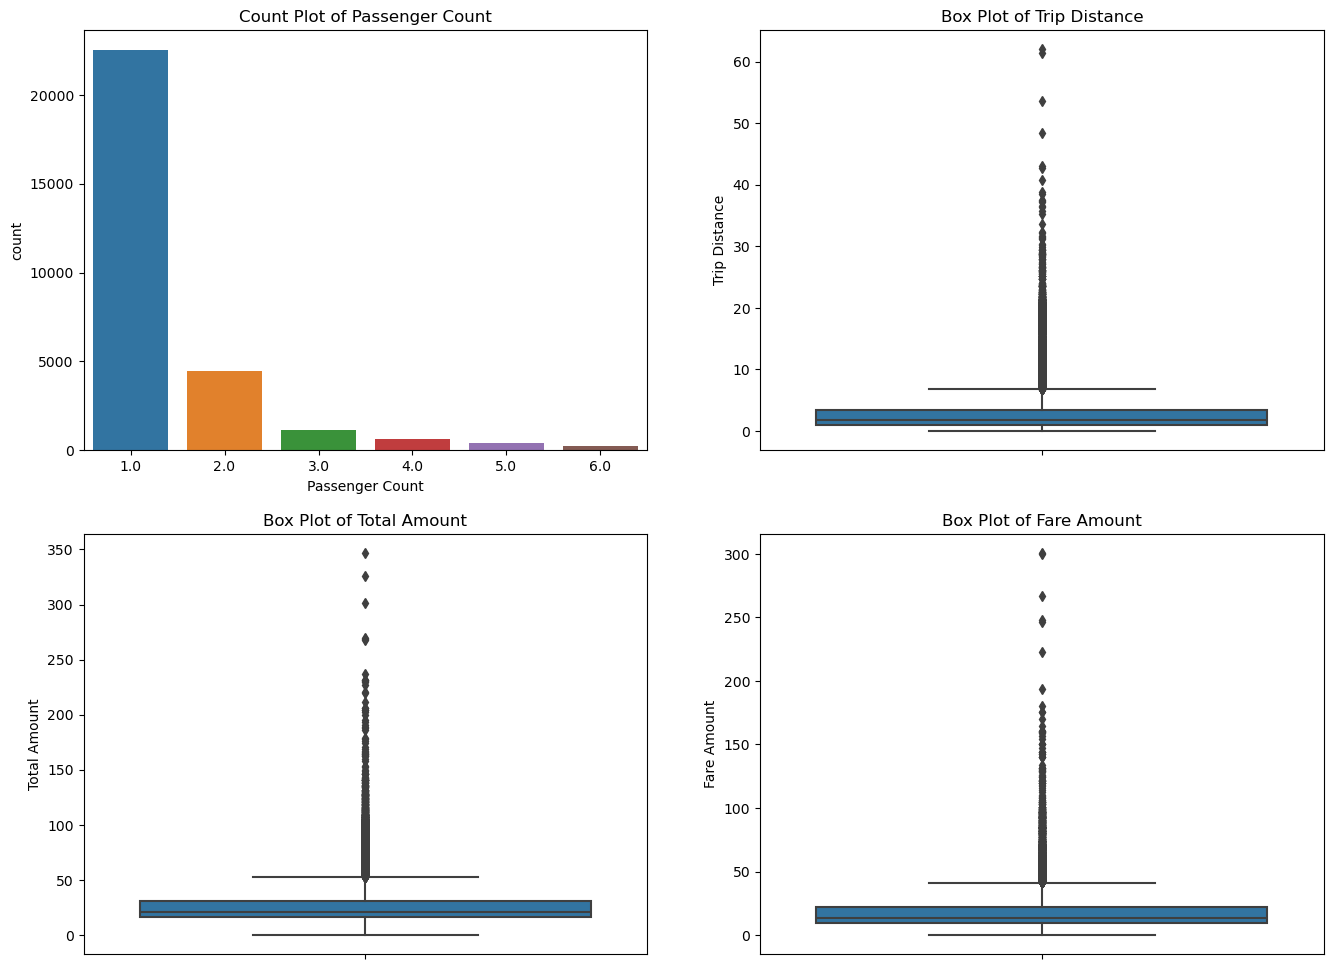

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a 2x2 grid of subplots to find the outliners
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  


#Fare Amount 
sns.boxplot(y=df['fare_amount'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Fare Amount')
axes[1, 1].set_ylabel('Fare Amount')



# Total Amount
sns.boxplot(y=df['total_amount'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Total Amount')
axes[1, 0].set_ylabel('Total Amount')

# Trip Distance 
sns.boxplot(y=df['trip_distance'], ax=axes[0, 1])
axes[0,1].set_title('Box Plot of Trip Distance')
axes[0, 1].set_ylabel('Trip Distance')

#Passenger Count 
sns.countplot(x=df['passenger_count'], ax=axes[0, 0])
axes[0, 0].set_title('Count Plot of Passenger Count')
axes[0, 0].set_xlabel('Passenger Count')

plt.show()


In [112]:
df.to_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_3.csv', index=False)
print(f"After removing outliers saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_3.csv")

After removing outliers saved the cleaned data into file Cleaned_Sampled_NYC_Taxi_Data_3.csv


In [52]:
''' using this outliers approach , outliers we can remove . 
We will use this metod for most useful general approach to remove outliers''' 

def rem_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Removed {len(df) - len(df_filtered)} outliers from '{column}' using IQR.")
    return df_filtered




In [59]:
df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_3.csv')
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-03-15 13:19:09   2023-03-15 13:48:16              1.0   
1              2  2023-12-07 21:32:41   2023-12-07 22:02:50              1.0   
2              2  2023-01-06 19:24:49   2023-01-06 19:36:11              1.0   
3              2  2023-11-28 13:54:06   2023-11-28 14:13:44              1.0   
4              2  2023-05-13 16:13:41   2023-05-13 16:29:15              1.0   
...          ...                  ...                   ...              ...   
251542         1  2023-04-14 06:52:18   2023-04-14 07:01:14              1.0   
251543         1  2023-08-21 16:07:56   2023-08-21 16:32:15              1.0   
251544         2  2023-02-08 19:46:29   2023-02-08 19:53:38              1.0   
251545         2  2023-07-19 14:21:15   2023-07-19 14:25:54              1.0   
251546         1  2023-11-21 23:02:29   2023-11-21 23:12:19              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.38         1.0                  N           230   
1                3.67         1.0                  N           114   
2                1.16         1.0                  N           229   
3                2.05         1.0                  N           237   
4                1.80         1.0                  N            48   
...               ...         ...                ...           ...   
251542           0.80        99.0                  N           250   
251543           3.10         1.0                  N           158   
251544           1.79         1.0                  N           236   
251545           0.73         1.0                  N            68   
251546           1.40         1.0                  N           239   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                 13             2  ...      0.5        0.00           0.0   
1                224             1  ...      0.5        6.22           0.0   
2                142             1  ...      0.5        3.58           0.0   
3                164             1  ...      0.5        4.34           0.0   
4                162             1  ...      0.5        1.89           0.0   
...              ...           ...  ...      ...         ...           ...   
251542           242             1  ...      0.5        0.00           0.0   
251543           161             1  ...      0.5        5.80           0.0   
251544           238             1  ...      0.5        3.00           0.0   
251545            90             2  ...      0.5        0.00           0.0   
251546           263             1  ...      0.5        1.25           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
0                         1.0         32.90                   2.5  2023-03-15   
1                         1.0         37.32                   2.5  2023-12-07   
2                         1.0         21.48                   2.5  2023-01-06   
3                         1.0         26.04                   2.5  2023-11-28   
4                         1.0         20.79                   2.5  2023-05-13   
...                       ...           ...                   ...         ...   
251542                    1.0         18.00                   0.0  2023-04-14   
251543                    1.0         34.90                   2.5  2023-08-21   
251544                    1.0         19.50                   2.5  2023-02-08   
251545                    1.0         10.50                   2.5  2023-07-19   
251546                    1.0         16.25                   2.5  2023-11-21   

        hour  year  airport_fee  
0         13  2023          0.0  
1         21  2023          0.0  
2         19  2023          0.0  
3         13  2023          0.0  
4         16  2023          0.0  
...      ...   ...          ...  
251542     6  2023          0.0  
251543    16  2023      

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [117]:
df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_3.csv')

df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'year',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [118]:
print(''' 

Numerical variables : 
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
trip_duration

Categorical variables:
VendorID:
RatecodeID
PULocationID
DOLocationID
payment_type
pickup_hour
trip_duration

some times we will use date and time as categorical values like based for each  hours and date.

The following monetary parameters belong in the same category, is it categorical or numerical?

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

These above monetary parameters are all numerical variables, they represent money can be treated as continuous numerical data.

''')

 

Numerical variables : 
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
trip_duration

Categorical variables:
VendorID:
RatecodeID
PULocationID
DOLocationID
payment_type
pickup_hour
trip_duration

some times we will use date and time as categorical values like based for each  hours and date.

The following monetary parameters belong in the same category, is it categorical or numerical?

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

These above monetary parameters are all numerical variables, they represent money can be treated as continuous numerical data.




##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

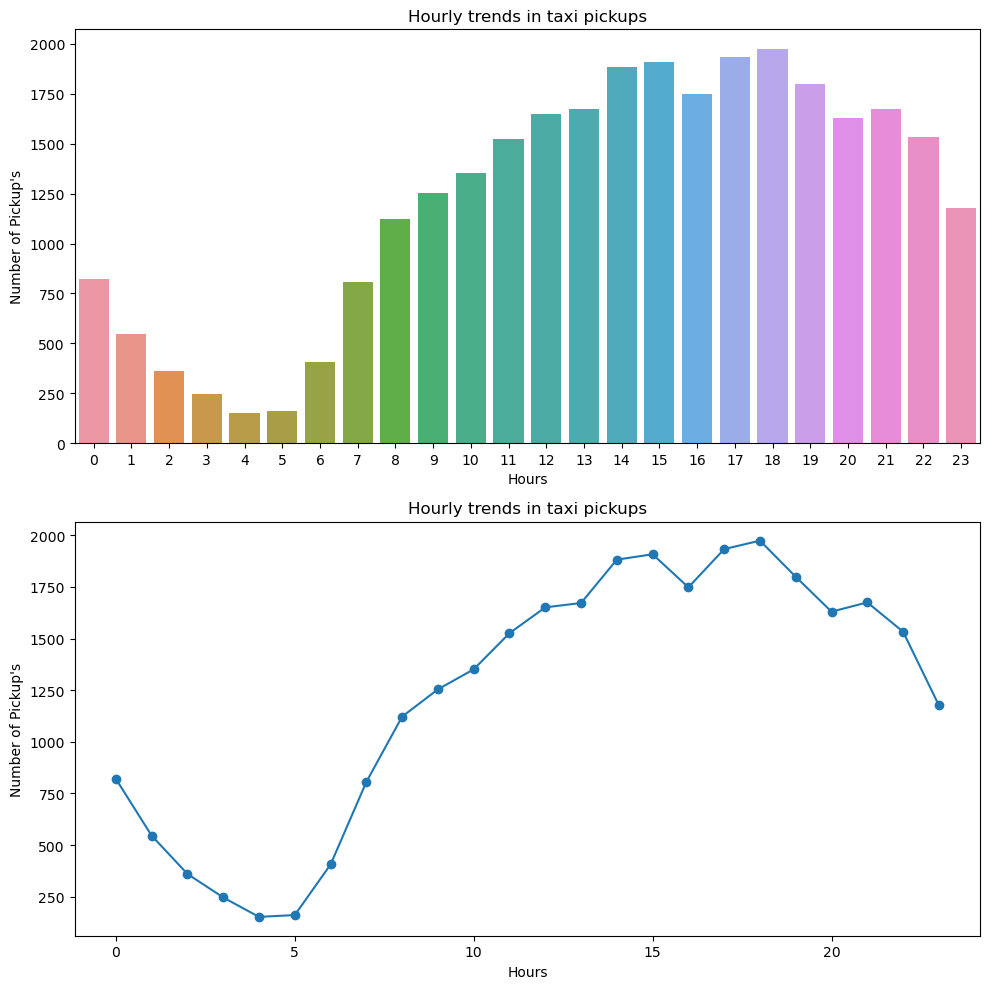

In [122]:
# Find and show the hourly trends in taxi pickups
#to find the peak hours when taxi demand is more 
# Reading CSV file 
df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_3.csv')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour_pick']= df['tpep_pickup_datetime'].dt.hour
df['day_pick']= df['tpep_pickup_datetime'].dt.dayofweek 
df['month_pick']= df['tpep_pickup_datetime'].dt.month

# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

hourly_pickups = df['hour_pick'].value_counts().sort_index()
hourly_pickups
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
#Barplot
sns.barplot(x=hourly_pickups.index,y=hourly_pickups.values,ax=axes[0])
axes[0].set_title("Hourly trends in taxi pickups")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Number of Pickup's")

#LinePlot
axes[1].plot(hourly_pickups.index, hourly_pickups.values, marker='o', linestyle='-')
axes[1].set_title("Hourly trends in taxi pickups")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Number of Pickup's")


plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


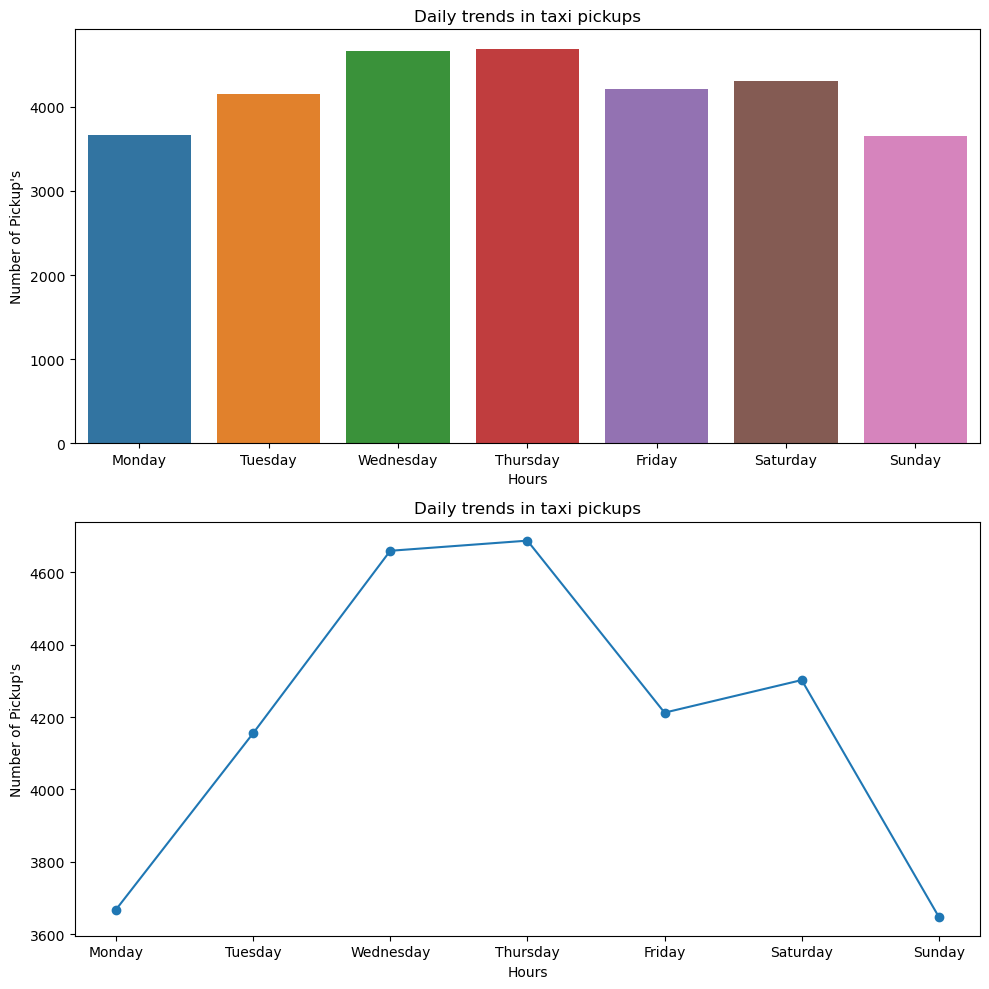

In [127]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['week_pick']= df['tpep_pickup_datetime'].dt.dayofweek 

# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns


week_pickups = df['week_pick'].value_counts().reindex(range(7), fill_value=1) 

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
#Barplot
sns.barplot(x=day_labels,y=week_pickups.values,ax=axes[0])
axes[0].set_title("Daily trends in taxi pickups")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Number of Pickup's")

#LinePlot
axes[1].plot(day_labels, week_pickups.values, marker='o', linestyle='-')
axes[1].set_title("Daily trends in taxi pickups")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Number of Pickup's")


plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


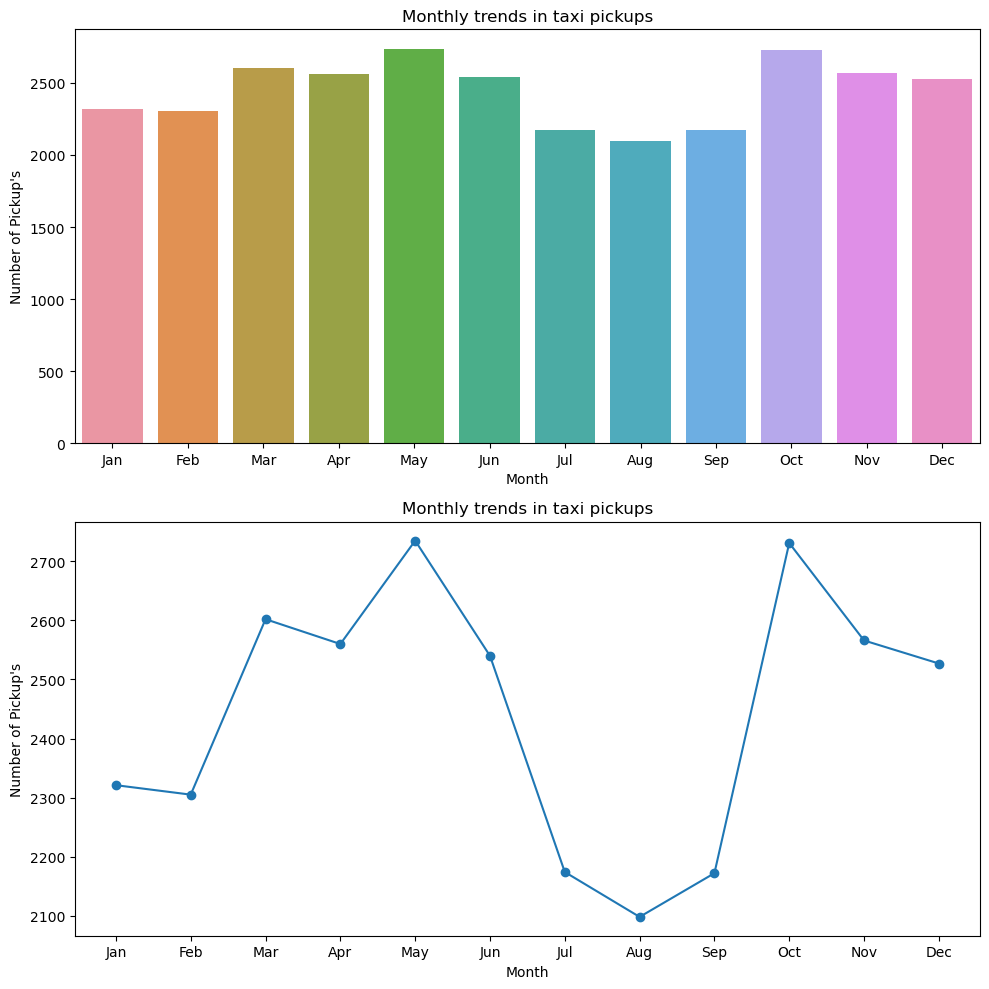

In [128]:
# Show the monthly trends in pickups


# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns


df['month_pick']= df['tpep_pickup_datetime'].dt.month

monthly_pickups = df['month_pick'].value_counts().sort_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
#Barplot
sns.barplot(x=month_labels,y=monthly_pickups.values,ax=axes[0])
axes[0].set_title("Monthly trends in taxi pickups")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Number of Pickup's")

#LinePlot
axes[1].plot(month_labels, monthly_pickups.values, marker='o', linestyle='-')
axes[1].set_title("Monthly trends in taxi pickups")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Pickup's")


plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [129]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    num_zeros_value = (df[col] == 0).sum()
    num_negatives_value = (df[col] < 0).sum()
    print("ColumnName: "+ col)
    print(" Zero values:" + str(num_zeros_value))
    print(" Negavtive values:" + str(num_negatives_value))
    

ColumnName: fare_amount
 Zero values:11
 Negavtive values:0
ColumnName: tip_amount
 Zero values:6602
 Negavtive values:0
ColumnName: total_amount
 Zero values:6
 Negavtive values:0
ColumnName: trip_distance
 Zero values:346
 Negavtive values:0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

-- Upon checking , we don't have any negative values in the dataframe for these columns. 

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [133]:
# Create a df with non zero entries for the selected parameters.
''' 
Identfied few rows pickup and drop is in the same zone , it might be short diatnace and we have insights
trip_distnace and other insights we should not drop rows  where where pickup and drop is in the same zone.
Observed above mentioned columns which are having total_amount,tip_amount,fare_amount zero values,needs 
to be dropped .zero trip_distance dropping could lead to loss of information, as those trips might still
 be valid and have valuable insights. 
'''

check_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
for col in check_columns:
    num_zeros_count_before = (df[col] == 0).sum()
    if col == "trip_distance":
        df = df[~((df[col] == 0) & (df['fare_amount'] == 0) & (df['total_amount'] == 0))]

    else:
        df = df[df[col]>0]
    num_zeros_count_after = (df[col] == 0).sum()
    print(f"Column Name: {col}")
    print(f"Number of zero values before filtering: {num_zeros_count_before}")
    print(f"Number of zero values after filtering: {num_zeros_count_after}")
    
df.to_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_4.csv", index=False)
print("After saved to: Cleaned_Sampled_NYC_Taxi_Data_4.csv")       


Column Name: fare_amount
Number of zero values before filtering: 0
Number of zero values after filtering: 0
Column Name: tip_amount
Number of zero values before filtering: 0
Number of zero values after filtering: 0
Column Name: total_amount
Number of zero values before filtering: 0
Number of zero values after filtering: 0
Column Name: trip_distance
Number of zero values before filtering: 139
Number of zero values after filtering: 139
After saved to: Cleaned_Sampled_NYC_Taxi_Data_4.csv


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [135]:
# Group data by month and analyse monthly revenue

df = pd.read_csv('/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Cleaned_Sampled_NYC_Taxi_Data_4.csv')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['month_pick']= df['tpep_pickup_datetime'].dt.month
monthly_revenue = df.groupby('month_pick')['total_amount'].sum()
print("Monthly revenue:")
print(monthly_revenue)

Monthly revenue:
month_pick
1     50039.58
2     48956.84
3     59552.10
4     58054.29
5     63568.00
6     61016.23
7     48166.91
8     45597.36
9     53436.46
10    65051.38
11    57551.92
12    59367.38
Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [137]:
# Calculate proportion of each quarter

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['quarter_pick']= df['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df.groupby('quarter_pick')['total_amount'].sum()
total_revenue = quarter_revenue.sum()
proportion_quarter = quarter_revenue/total_revenue
print("Proportion of each quarter")
print(proportion_quarter)


Proportion of each quarter
quarter_pick
1    0.236513
2    0.272449
3    0.219585
4    0.271453
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

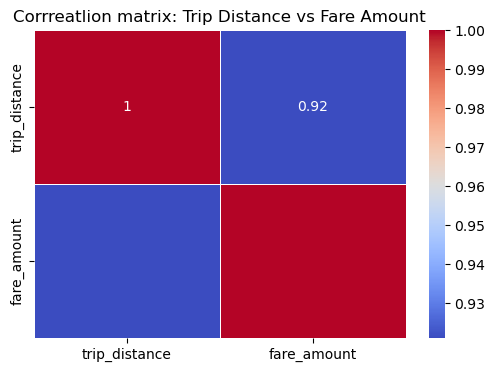

Corrreatlion : Trip Distance vs Fare Amount


0.9210367981939256

In [140]:
# Show how trip fare is affected by distance

# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[['trip_distance', 'fare_amount']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrreatlion matrix: Trip Distance vs Fare Amount")
plt.show()


#Print the correlation 
print("Corrreatlion : Trip Distance vs Fare Amount")
correlation



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

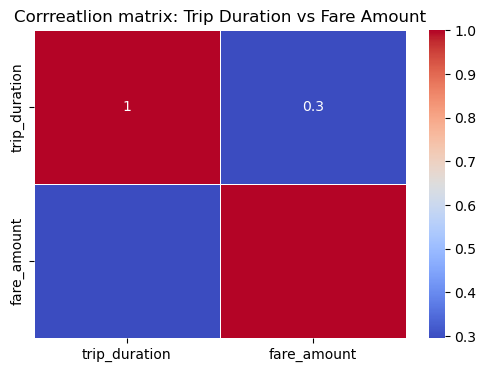

Corrreatlion : Trip Duration vs Fare Amount


0.2951771576992387

In [143]:
# Show relationship between fare and trip duration
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
# tpep_pickup_datetime	tpep_dropoff_datetime
df['start_time'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['end_time'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate time difference
df['trip_duration'] = df['end_time'] - df['start_time']


corr_matrix = df[['trip_duration', 'fare_amount']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrreatlion matrix: Trip Duration vs Fare Amount")
plt.show()


#Print the correlation 
print("Corrreatlion : Trip Duration vs Fare Amount")
correlation = df['trip_duration'].corr(df['fare_amount'])
correlation


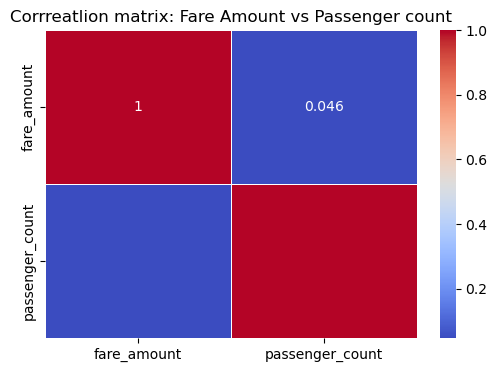

Corrreatlion : Fare Amount vs Passenger count


0.04633462749152897

In [146]:
# Show relationship between fare and number of passengers

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[['fare_amount', 'passenger_count']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrreatlion matrix: Fare Amount vs Passenger count")
plt.show()


#Print the correlation 
print("Corrreatlion : Fare Amount vs Passenger count")
correlation = df['fare_amount'].corr(df['passenger_count'])
correlation

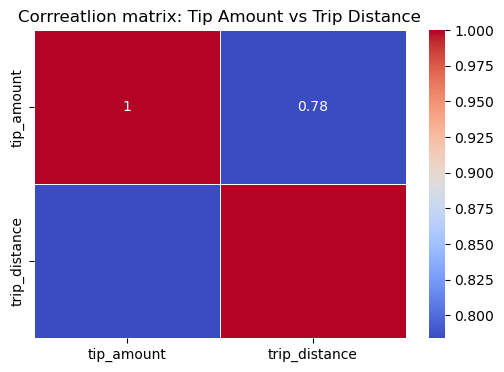

Corrreatlion : Tip Amount vs Trip Distance


0.7840589801060401

In [147]:
# Show relationship between tip and trip distance
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[['tip_amount', 'trip_distance']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrreatlion matrix: Tip Amount vs Trip Distance")
plt.show()


#Print the correlation 
print("Corrreatlion : Tip Amount vs Trip Distance")
correlation = df['tip_amount'].corr(df['trip_distance'])
correlation


In [ ]:
- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute

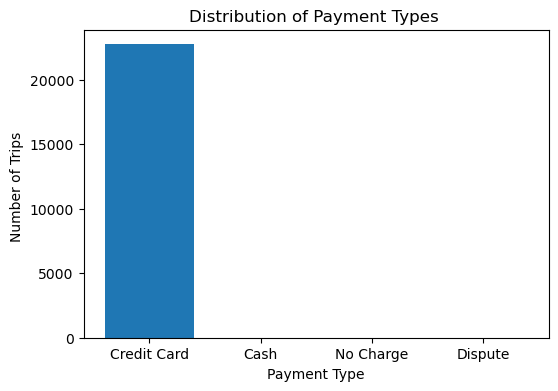

Payment Type Counts:
payment_type
1    22728
2        1
3        1
4        1
Name: count, dtype: int64
Payment Type Proportions:
Credit Card: 99.99%
Cash: 0.00%
No Charge: 0.00%
Dispute: 0.00%


In [160]:
payment_type_counts = df['payment_type'].value_counts().reindex(range(1, 5), fill_value=1)

#Labels defining from the above payment types
payment_type_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}
plt.figure(figsize=(6, 4))
plt.bar(payment_type_labels.values(), payment_type_counts.values)
plt.title('Distribution of Payment Types ')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips ')
plt.show()

# Print the payment type counts and proportions
total_trips = payment_type_counts.sum()
print("Payment Type Counts:")
print(payment_type_counts)
print("Payment Type Proportions:")
for payment_type, payment_count in payment_type_counts.items():
    proportion = payment_count / total_trips
    print(f"{payment_type_labels.get(payment_type)}: {proportion:.2%}")

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [162]:
pip install geopandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 7.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [164]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
# Display first few rows
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

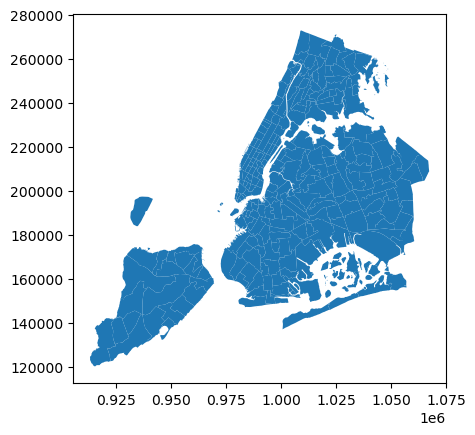

In [166]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [170]:
# Merge zones and trip records using locationID and PULocationID

merged_zones_trip_df = pd.merge(df ,zones, left_on="PULocationID", right_on="LocationID", how="left", indicator=True)

df = merged_zones_trip_df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'})
df.drop(columns=['LocationID'], inplace=True)
df.head()
df.to_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Merged_NYC_Taxi_Data.csv", index=False)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [184]:
# Group data by location and calculate the number of trips
df = pd.read_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Merged_NYC_Taxi_Data.csv")
df.info()
df.head()
df_group_location = df.groupby("pickup_zone").size().reset_index()
print("Total number of trips per location ID")

df_group_location.rename(columns={"pickup_zone": "zone"}, inplace=True)

# Merge back to original DataFrame
zones_merge_back= zones.merge(df_group_location, on="zone", how="left")

zones_merge_back.fillna(0, inplace=True)
zones_merge_back.rename(columns={"o": "total_trips"}, inplace=True)
zones_merge_back

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22729 entries, 0 to 22728
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22729 non-null  int64  
 1   tpep_pickup_datetime   22729 non-null  object 
 2   tpep_dropoff_datetime  22729 non-null  object 
 3   passenger_count        22729 non-null  float64
 4   trip_distance          22729 non-null  float64
 5   RatecodeID             22729 non-null  float64
 6   store_and_fwd_flag     22729 non-null  object 
 7   PULocationID           22729 non-null  int64  
 8   DOLocationID           22729 non-null  int64  
 9   payment_type           22729 non-null  int64  
 10  fare_amount            22729 non-null  float64
 11  extra                  22729 non-null  float64
 12  mta_tax                22729 non-null  float64
 13  tip_amount             22729 non-null  float64
 14  tolls_amount           22729 non-null  float64
 15  im

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry      0  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...    1.0  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...    0.0  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...    0.0  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   27.0  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...    0.0  
..             ...                                                ...    ...  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...    0.0  
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...    3.0  
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  112.0  
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  309.0  
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  479.0  

[263 rows x 8 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [203]:
# Merge trip counts back to the zones GeoDataFrame

df_merged_back_file = pd.read_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Merged_BackNYC_Taxi_Data.csv")

df_merged_back_file.rename(columns={"0": "total_trips"}, inplace=True)
df_merged_back_file

zones=df_merged_back_file
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.9183527103 192536.08569720192...   
1           Queens  MULTIPOLYGON (((1033269.2435912937 172126.0078...   
2            Bronx  POLYGON ((1026308.7695066631 256767.6975403726...   
3        Manhattan  POLYGON ((992073.4667968601 203714.07598876953...   
4    Staten Island  POLYGON ((935843.3104932606 144283.33585065603...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.7819601893 270986.1393638253...   
259         Queens  POLYGON ((1011466.966050446 216463.0052037984,...   
260      Manhattan  POLYGON ((980555.2043112218 196138.48625847697...   
261      Manhattan  MULTIPOLYGON (((999804.7945504487 224498.52704...   
262      Manhattan  POLYGON ((997493.3227153122 220912.38616232574...   

     total_trips  
0            1.0  
1            0.0  
2            0.0  
3           27.0  
4            0.0  
..           ...  
258          0.0  
259          3.0  
260        112.0  
261        309.0  
262        479.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

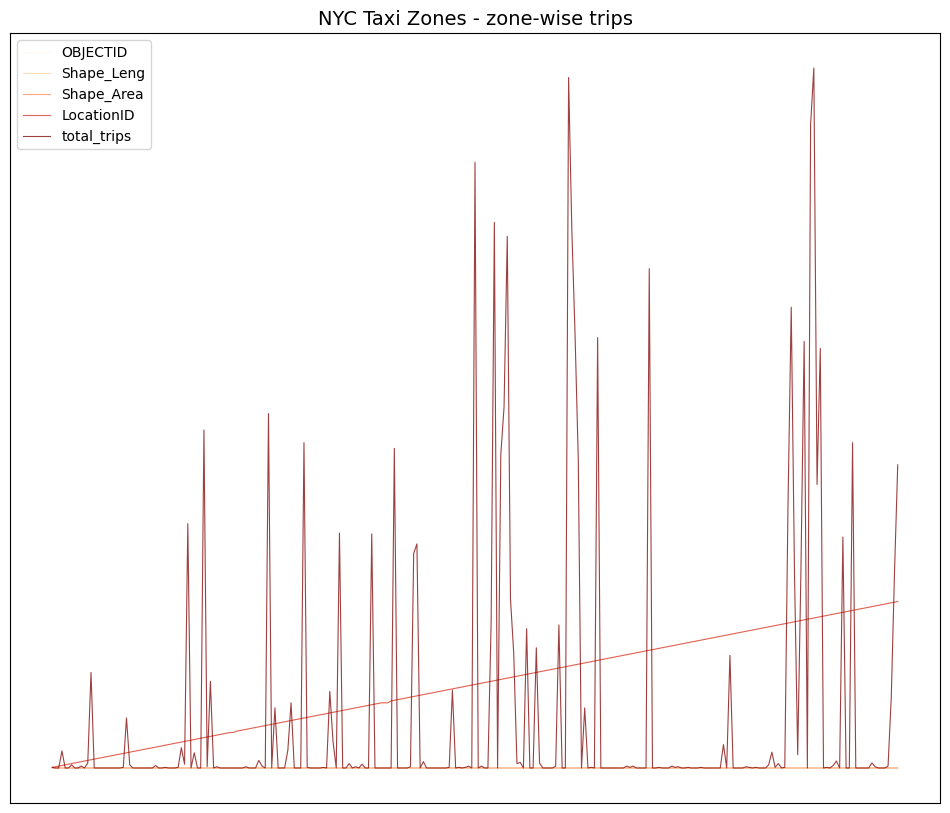

In [204]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the map and display it

# Define figure and axis


# Plot the map and display it
# Plot the choropleth map based on the total number of trips per zone
zones.plot(
    cmap="OrRd",
    column="total_trips",
    linewidth=0.8,   
    alpha=0.75,  
    ax=ax,  
    legend=True
    
)


ax.set_title("NYC Taxi Zones - zone-wise trips", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
plt.show()




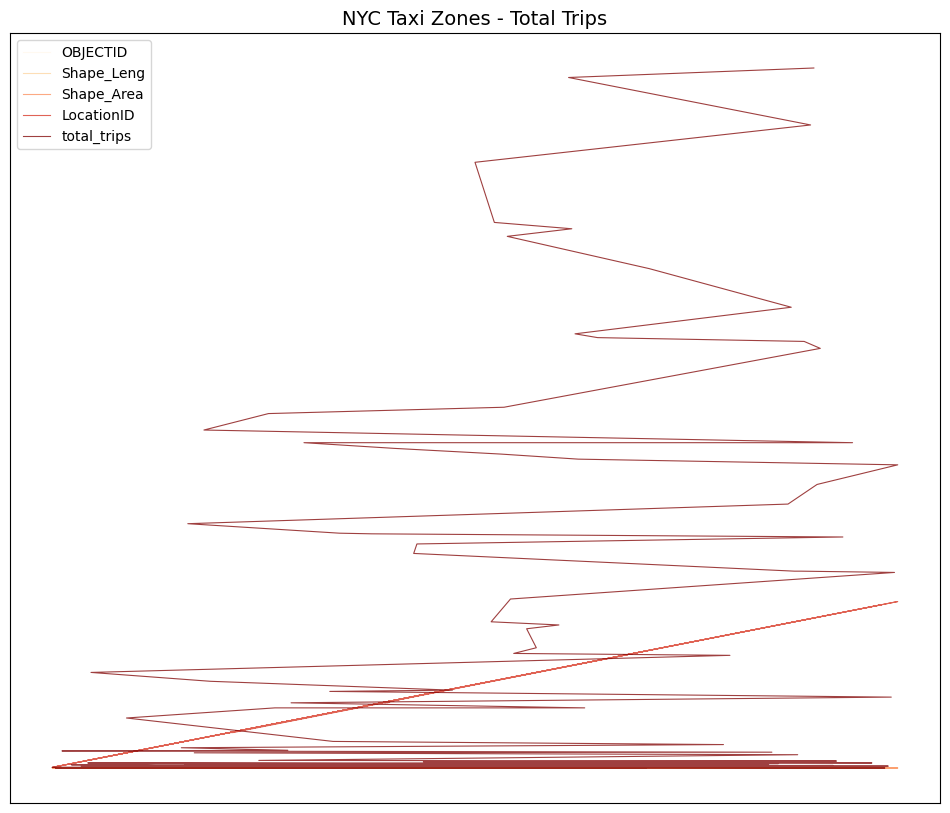

In [208]:
# can you try displaying the zones DF sorted by the number of trips?
ones_sorted = zones.sort_values(by="total_trips", ascending=False)

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
# Plot the choropleth map based on the total number of trips per zone
ones_sorted.plot(
    column="total_trips",  # Column used for color mapping
    cmap="OrRd",  # Colormap (Orange-Red)
    linewidth=0.8,  # Border thickness
    alpha=0.75,  # Transparency level
    ax=ax,  # Plot on the defined axis
    legend=True,  # Enable legend
)

# Set title
ax.set_title("NYC Taxi Zones - Total Trips", fontsize=14)

# Hide axis labels for a clean map
ax.set_xticks([])
ax.set_yticks([])

# Show plot
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [32]:
# Find routes which have the slowest speeds at different times of the day
import pandas as pd

df = pd.read_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Merged_NYC_Taxi_Data.csv")
# To convert into date time object
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
# To extract hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
# To extract hour
df["trip_duration_hours"] = (df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]).dt.total_seconds() / 3600 
df.loc[df['trip_duration_hours'] == 0, 'trip_duration_hours'] = float('nan')
# To calculate mph
df["speed_per_hour"] = df["trip_distance"] /df["trip_duration_hours"]

slow_routes = df.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])['speed_per_hour'].mean().reset_index()
slow_routes = slow_routes.sort_values(by=['pickup_hour','speed_per_hour'])
slow_routes = slow_routes[slow_routes['PULocationID']!=slow_routes['DOLocationID']]
df_merged_back_file = pd.read_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Merged_BackNYC_Taxi_Data.csv")
df_merged_back_file.rename(columns={"0": "total_trips"}, inplace=True)
zones=df_merged_back_file

mapping = dict(zones[['LocationID','zone']].values)
slow_routes_pickupzones = slow_routes['PULocationID'].head(10)
slow_routes_pickupzones =slow_routes_pickupzones.map(mapping)
slow_routes_pickupzones

13                      Clinton East
413        Times Sq/Theatre District
400        Times Sq/Theatre District
64                      East Village
254              Little Italy/NoLiTa
85                          Flatiron
319                     Midtown East
288    Meatpacking/West Village West
351                    Midtown South
260                  Lower East Side
Name: PULocationID, dtype: object

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


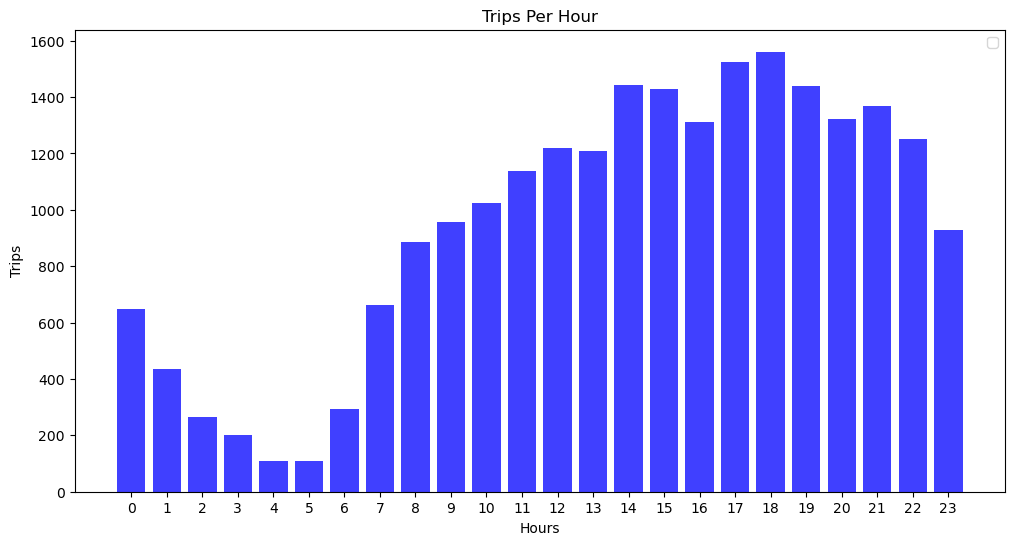

Busiest hour 18and number of trips for that hour is 1561


In [21]:
# Visualise the number of trips per hour and find the busiest hour
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
# To take  hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
hourly_trips = df["pickup_hour"].value_counts().sort_index()
busiest_hour = hourly_trips.idxmax()
busiest_hour_trips = hourly_trips.max()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.bar(hourly_trips.index, hourly_trips.values, color='blue', alpha=0.75)
plt.xticks(range(24))  
plt.legend()
plt.title('Trips Per Hour')
plt.xlabel('Hours')
plt.ylabel('Trips')
plt.show()

print(f"Busiest hour {busiest_hour}and number of trips for that hour is {busiest_hour_trips}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

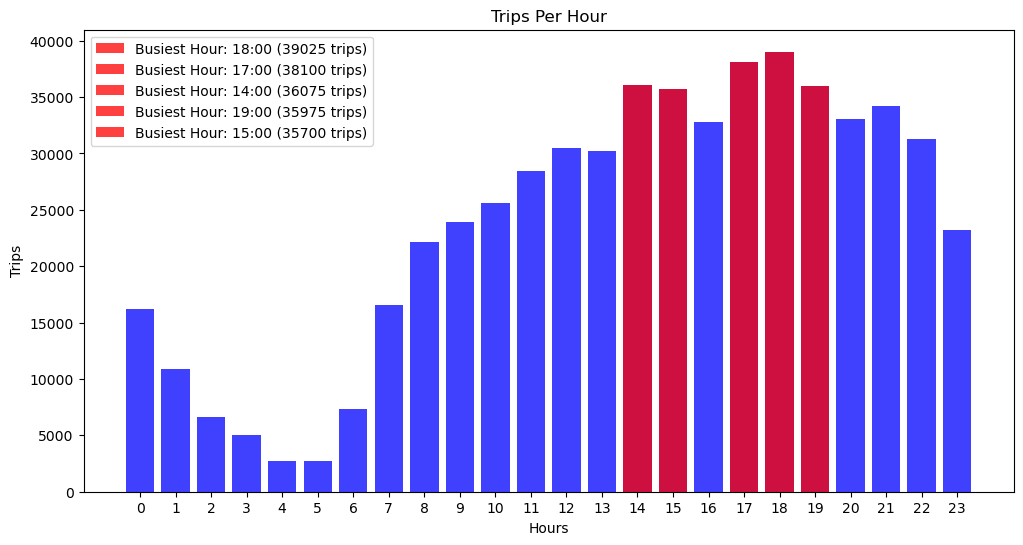

Actual number of Trips in the busiest hours is pickup_hour
18    39025.0
17    38100.0
14    36075.0
19    35975.0
15    35700.0
Name: count, dtype: float64


In [30]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.04
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
# To take  hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

hourly_trips = df["pickup_hour"].value_counts().sort_index()

scale_hourly_trips = hourly_trips /sample_fraction
# Five Busiest Hours
five_busiest_hours = scale_hourly_trips.nlargest(5)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.bar(scale_hourly_trips.index, scale_hourly_trips.values, color='blue', alpha=0.75)

for hour, trips in five_busiest_hours.items():
    plt.bar(hour, trips, color='red', alpha=0.75, label=f'Busiest Hour: {hour}:00 ({int(trips)} trips)')
    
plt.xticks(range(24))  
plt.legend()
plt.title('Trips Per Hour')
plt.xlabel('Hours')
plt.ylabel('Trips')
plt.show()

print(f"Actual number of Trips in the busiest hours is {five_busiest_hours}")


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

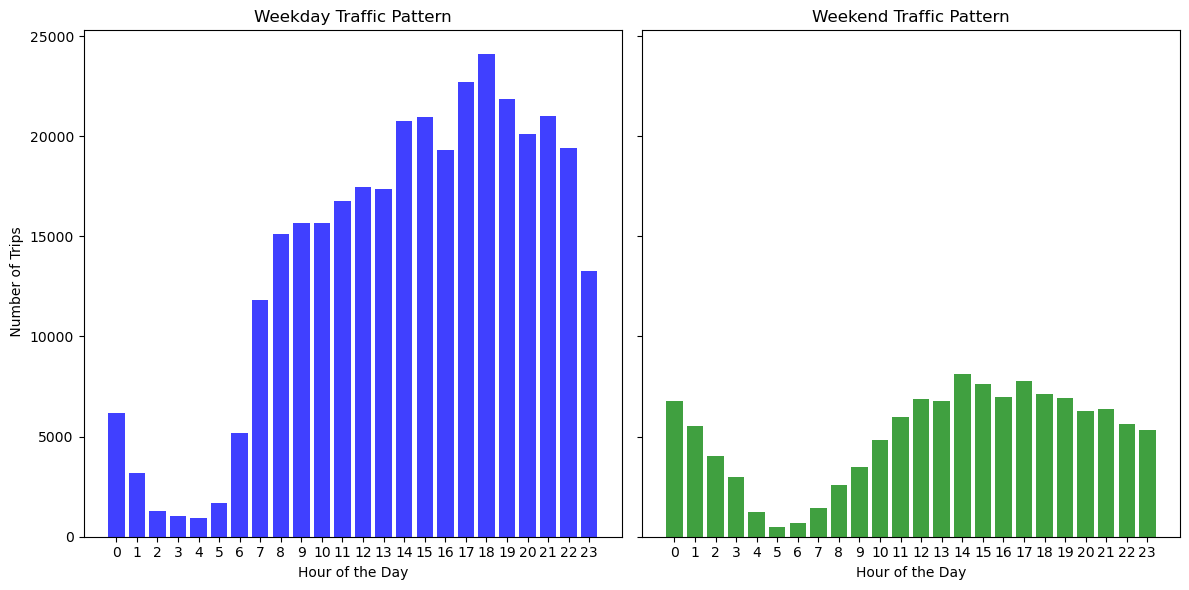

In [37]:
# Compare traffic trends for the week days and weekends
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
# To take  week of day
df["week_pick"]= df["tpep_pickup_datetime"].dt.dayofweek 
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

df_weekdays = df[df['week_pick'] < 5]
df_weekends = df[df['week_pick'] >= 5]

weekdays_hourly_pickups = df_weekdays['pickup_hour'].value_counts().sort_index()
weekends_hourly_pickups = df_weekends['pickup_hour'].value_counts().sort_index()

sampling_ratio = 0.05  

weekday_hourly_trips_scaled = weekdays_hourly_pickups / sampling_ratio
weekend_hourly_trips_scaled = weekends_hourly_pickups / sampling_ratio

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Weekdays Pattern
ax[0].bar(weekday_hourly_trips_scaled.index, weekday_hourly_trips_scaled.values, color='blue', alpha=0.75)
ax[0].set_title("Weekday Traffic Pattern")
ax[0].set_xlabel("Hour of the Day")
ax[0].set_ylabel(" Number of Trips")
ax[0].set_xticks(range(24))
# Weekend Traffic Pattern
ax[1].bar(weekend_hourly_trips_scaled.index, weekend_hourly_trips_scaled.values, color='green', alpha=0.75)
ax[1].set_title("Weekend Traffic Pattern")
ax[1].set_xlabel("Hour of the Day")
ax[1].set_xticks(range(24))
plt.tight_layout()
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [33]:
# Find top 10 pickup and dropoff zones
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
# Pickup hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
#Drop hour
df["drop_hour"] = df["tpep_dropoff_datetime"].dt.hour
pickup_counts = df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')


dropoff_counts = df.groupby(['DOLocationID', 'drop_hour']).size().reset_index(name='dropoff_count')

top_10_pickups = pickup_counts.nlargest(10, 'pickup_count')


top_10_dropoffs = dropoff_counts.nlargest(10, 'dropoff_count')

mapping = dict(zones[['LocationID','zone']].values)
top_10_pickups_zones = top_10_pickups["PULocationID"]
top_10_dropoffs_zones = top_10_dropoffs["DOLocationID"]
top_10_pickups_zones =top_10_pickups_zones.map(mapping)
top_10_dropoffs_zones =top_10_dropoffs_zones.map(mapping)


print("Top 10 zones with high hourly pickups:")
print(top_10_pickups_zones)

print("\nTop 10 zones with high hourly drop-offs:")
print(top_10_dropoffs_zones)


Top 10 zones with high hourly pickups:
782            Midtown Center
1181    Upper East Side South
783            Midtown Center
1182    Upper East Side South
784            Midtown Center
1159    Upper East Side North
785            Midtown Center
1179    Upper East Side South
518               JFK Airport
1158    Upper East Side North
Name: PULocationID, dtype: object

Top 10 zones with high hourly drop-offs:
1851    Upper East Side North
1847    Upper East Side North
1872    Upper East Side South
1848    Upper East Side North
1846    Upper East Side North
1871    Upper East Side South
1845    Upper East Side North
1869    Upper East Side South
1849    Upper East Side North
1873    Upper East Side South
Name: DOLocationID, dtype: object


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [36]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts().rename('Total_Pickups')
dropoff_counts = df['DOLocationID'].value_counts().rename('Total_Dropoffs')

zone_counts = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts}).fillna(0)

zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count'].replace(0, 1)


top_10_highest_zones = zone_counts.nlargest(10, 'pickup_dropoff_ratio')
top_10_lowest_zones = zone_counts.nsmallest(10, 'pickup_dropoff_ratio')

print("Top 10 highest pickup/dropoff ratios:")
print(top_10_highest_zones)

print("\nTop 10 lowest pickup/dropoff ratios:")
print(top_10_lowest_zones)

Top 10 highest pickup/dropoff ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
70           95.0             13              7.307692
132         957.0            202              4.737624
138         862.0            326              2.644172
93            7.0              4              1.750000
186         789.0            489              1.613497
114         354.0            228              1.552632
100         370.0            267              1.385768
43          386.0            283              1.363958
162         852.0            641              1.329173
249         514.0            395              1.301266

Top 10 lowest pickup/dropoff ratios:
    pickup_count  dropoff_count  pickup_dropoff_ratio
3            0.0              1                   0.0
8            0.0              1                   0.0
14           0.0             13                   0.0
15           0.0              3                   0.0
16           0.0              2                  

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [42]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
# Pickup hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
#Drop hour
df["drop_hour"] = df["tpep_dropoff_datetime"].dt.hour

pickups_night = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
drops_night = df[(df['drop_hour'] >= 23) | (df['drop_hour'] <= 5)]

pickup_counts = df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')


dropoff_counts = df.groupby(['DOLocationID', 'drop_hour']).size().reset_index(name='dropoff_count')

top_10_pickups_zones = pickup_counts.nlargest(10, 'pickup_count')


top_10_dropoffs_zones = dropoff_counts.nlargest(10, 'dropoff_count')
mapping = dict(zones[['LocationID','zone']].values)

top_10_pickups_zones = top_10_pickups_zones["PULocationID"]
top_10_dropoffs_zones = top_10_dropoffs_zones["DOLocationID"]
top_10_pickups_zones =top_10_pickups_zones.map(mapping)
top_10_dropoffs_zones =top_10_dropoffs_zones.map(mapping)
print("Top 10 zones with high hourly pickups:")
print(top_10_pickups_zones)
print("\nTop 10 zones with high hourly drop-offs:")
print(top_10_dropoffs_zones)

Top 10 zones with high hourly pickups:
782            Midtown Center
1181    Upper East Side South
783            Midtown Center
1182    Upper East Side South
784            Midtown Center
1159    Upper East Side North
785            Midtown Center
1179    Upper East Side South
518               JFK Airport
1158    Upper East Side North
Name: PULocationID, dtype: object

Top 10 zones with high hourly drop-offs:
1851    Upper East Side North
1847    Upper East Side North
1872    Upper East Side South
1848    Upper East Side North
1846    Upper East Side North
1871    Upper East Side South
1845    Upper East Side North
1869    Upper East Side South
1849    Upper East Side North
1873    Upper East Side South
Name: DOLocationID, dtype: object


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Night Time Revenue Share: 6.530893538056749
Day Time Revenue Share: 93.46910646194324


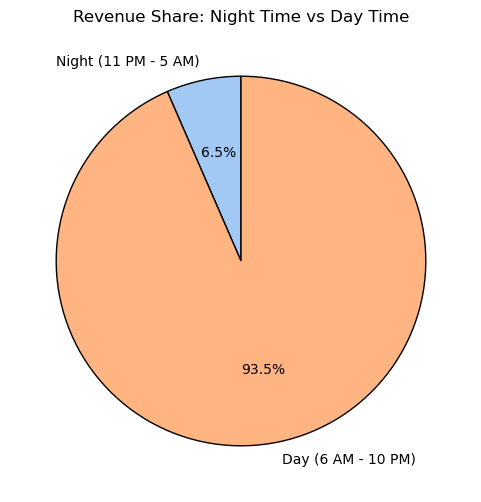

In [47]:
# Filter for night hours (11 PM to 5 AM)

df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Pickup hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
night_time_df = df[(df["pickup_hour"] > 23) | (df["pickup_hour"] < 5)]
day_time_df = df[(df["pickup_hour"] > 5) | (df["pickup_hour"] < 23)]

night_time_revenue = night_time_df["total_amount"].sum()
day_time_revenue = day_time_df["total_amount"].sum()

total_revenue = night_time_revenue + day_time_revenue

night_time_revenue_share = (night_time_revenue / total_revenue) * 100

day_time_revenue_share = (day_time_revenue / total_revenue) * 100
print(f"Night Time Revenue Share: {night_time_revenue_share}")
print(f"Day Time Revenue Share: {day_time_revenue_share}")

revenue_share_df = pd.DataFrame({
    "TimePeriod": ["Night (11 PM - 5 AM)", "Day (6 AM - 10 PM)"],
    "Total Revenue": [night_time_revenue, day_time_revenue],
    "Revenue Share (%)": [night_time_revenue_share, day_time_revenue_share]
})

import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("pastel")[0:2]  

plt.figure(figsize=(6, 6))
plt.pie(revenue_share_df["Total Revenue"], labels=revenue_share_df["TimePeriod"], autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Revenue Share: Night Time vs Day Time")

plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [61]:
# Analyse the fare per mile per passenger for different passenger counts
df.loc[df['trip_distance'] == 0, 'trip_distance'] = float('nan')

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

df.loc[df['passenger_count'] == 0, 'passenger_count'] = float('nan')

df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

#Group by passenger and calculate average for mile per passenger
fare_analysis = df.groupby('passenger_count')[['fare_per_mile_per_passenger']].mean().reset_index()

fare_analysis



passenger_count  fare_per_mile_per_passenger
0              1.0                    10.996905
1              2.0                     3.796722
2              3.0                     3.332676
3              4.0                     8.946370
4              5.0                     1.491866
5              6.0                     1.426163

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [62]:
# Compare the average fare per mile for different days and for different times of the day
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract hour and weekdays
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name() 

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by hour and compute average fare per mile
hourly_fare_per_mile = df.groupby('hour')['fare_per_mile'].mean().reset_index()

# Group by day of the week and compute average fare per mile
daily_fare_per_mile = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Display results
print("Average fare per mile by hour:")
print(hourly_fare_per_mile)

print("\nAverage fare per mile by day of the week:")
print(daily_fare_per_mile)

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(fare_by_vendor["Vendor ID"], fare_by_vendor["Avg Fare per Mile"], color=['blue', 'orange'], alpha=0.75)
plt.title("Avg Fare per Mile by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile ($)")
plt.xticks(fare_by_vendor["Vendor ID"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Average fare per mile by hour:
    hour  fare_per_mile
0      0       6.372614
1      1       7.426471
2      2      12.060676
3      3       6.502082
4      4      14.756716
5      5       5.746660
6      6       6.396209
7      7       7.724428
8      8       7.675651
9      9       8.041066
10    10      19.909822
11    11       8.201351
12    12       8.643057
13    13       9.890591
14    14       8.357564
15    15       8.563321
16    16      19.195839
17    17       8.523870
18    18      15.910518
19    19       8.878523
20    20      13.826843
21    21       6.985626
22    22      14.131233
23    23      14.390040

Average fare per mile by day of the week:
  day_of_week  fare_per_mile
0      Friday       9.812836
1      Monday      15.968823
2    Saturday      10.621845
3      Sunday       7.879638
4    Thursday      10.335580
5     Tuesday      13.097490
6   Wednesday       8.930976


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average fare per mile by vendor and hour:
   VendorID  fare_per_mile
0         1       8.140628
1         2      11.806788


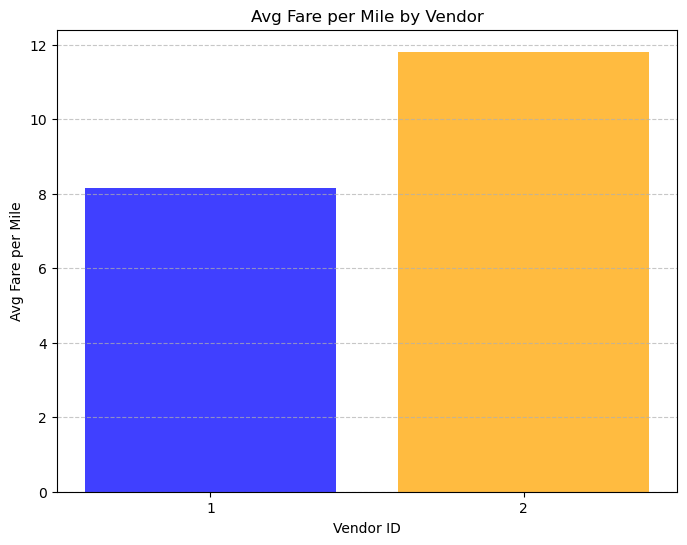

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract hour 
df['hour'] = df['tpep_pickup_datetime'].dt.hour

df.loc[df['trip_distance'] == 0, 'trip_distance'] = float('nan')

# Calculate fare per mile 
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by vendor then compute average fare per mile
vendor_hourly_fare = df.groupby(['VendorID'])['fare_per_mile'].mean().reset_index()

# Display results
print("Average fare per mile by vendor and hour:")
print(vendor_hourly_fare)

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(vendor_hourly_fare["VendorID"], vendor_hourly_fare["fare_per_mile"], color=['blue', 'orange'], alpha=0.75)
plt.title("Avg Fare per Mile by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile")
plt.xticks(vendor_hourly_fare["VendorID"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [67]:
# Defining distance tiers

df.loc[df['trip_distance'] == 0, 'trip_distance'] = float('nan')

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

df['distance_bin'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles'],right=True)

vendor_fare_analysis = df.groupby(['VendorID', 'distance_bin'])['fare_per_mile'].mean().reset_index()

print("Average fare per mile by vendor and distance bin:")
print(vendor_fare_analysis)


Average fare per mile by vendor and distance bin:
   VendorID distance_bin  fare_per_mile
0         1    0-2 miles       9.917905
1         1    2-5 miles       6.288862
2         1     5+ miles       4.467832
3         2    0-2 miles      16.785941
4         2    2-5 miles       6.587794
5         2     5+ miles       4.524434


/var/folders/g9/jds4gqk52qx0q3hxkp0wzr8m0000gp/T/ipykernel_84042/3143903597.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_fare_analysis = df.groupby(['VendorID', 'distance_bin'])['fare_per_mile'].mean().reset_index()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [25]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Merged_NYC_Taxi_Data.csv")
# To convert into date time object
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# To extract hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate Tip Percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

df['distance_bin'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles'],right=True)


tips_by_distance = df.groupby('distance_bin', as_index=False,observed=False)['tip_percentage'].mean()


print(tips_by_distance.to_string(index=False))
tips_by_passenger = df.groupby('passenger_count', as_index=False,observed=False)['tip_percentage'].mean()
print(tips_by_passenger.to_string(index=False))
tips_by_hour = df.groupby('pickup_hour', as_index=False)['tip_percentage'].mean()
print(tips_by_hour.to_string(index=False))


distance_bin  tip_percentage
   0-2 miles       28.956285
   2-5 miles       23.088315
    5+ miles       21.816433
 passenger_count  tip_percentage
             1.0       26.476628
             2.0       25.514286
             3.0       26.361371
             4.0       25.897506
             5.0       26.660676
             6.0       25.460223
 pickup_hour  tip_percentage
           0       25.734731
           1       26.406779
           2       27.185564
           3       28.886673
           4       24.421168
           5       26.110000
           6       25.952403
           7       24.953997
           8       24.687495
           9       25.170138
          10       26.311477
          11       25.497727
          12       25.287883
          13       25.520347
          14       27.214342
          15       25.140984
          16       26.804413
          17       27.212299
          18       27.485393
          19       28.804323
          20       26.207980
          21   

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [21]:
# See how passenger count varies across hours and days

# To convert into date time object
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
# To extract hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

#passenger_count= df.groupby('passenger_count', as_index=False,observed=False)['pickup_hour'].mean()
passenger_by_hour= df.groupby(df['pickup_hour'], as_index=False,observed=False)['passenger_count'].mean()
passenger_by_days= df.groupby(df['day_of_week'], as_index=False,observed=False)['passenger_count'].mean()

print("Passenger Count Variation Across Hours:")
print(passenger_by_hour)
print("Passenger Count Variation by days :")
print(passenger_by_days)

Passenger Count Variation Across Hours:
    pickup_hour  passenger_count
0             0         1.422840
1             1         1.407834
2             2         1.428571
3             3         1.348259
4             4         1.342593
5             5         1.333333
6             6         1.204082
7             7         1.262840
8             8         1.299435
9             9         1.345873
10           10         1.341463
11           11         1.384886
12           12         1.362069
13           13         1.408940
14           14         1.366597
15           15         1.389356
16           16         1.373953
17           17         1.366142
18           18         1.347854
19           19         1.379430
20           20         1.344436
21           21         1.443713
22           22         1.421263
23           23         1.432723
Passenger Count Variation by days :
  day_of_week  passenger_count
0      Friday         1.411439
1      Monday         1.346168
2    S

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [7]:
# How does passenger count vary across zones
import pandas as pd
df = pd.read_csv("/Users/s0n02z2/Documents/AI_ML/main_course/EDA_assignment/Datasets and Dictionary/Merged_NYC_Taxi_Data.csv")
passenger_by_hour= df.groupby(df['PULocationID'], as_index=False,observed=False)['passenger_count'].mean()

print("Passenger Count Variation Across Zones:")
print(passenger_by_hour)



Passenger Count Variation Across Zones:
     PULocationID  passenger_count
0               1         1.000000
1               4         1.518519
2               7         2.000000
3              10         3.000000
4              12         2.250000
..            ...              ...
108           261         1.339286
109           262         1.333333
110           263         1.277662
111           264         1.341584
112           265         1.500000

[113 rows x 2 columns]


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently


Extra Charge Frequency:
          Extracharge  Applied Count
              mta_tax          22532
                extra          14341
         tolls_amount           1799
improvement_surcharge          22726
 congestion_surcharge          21501
          airport_fee           1849


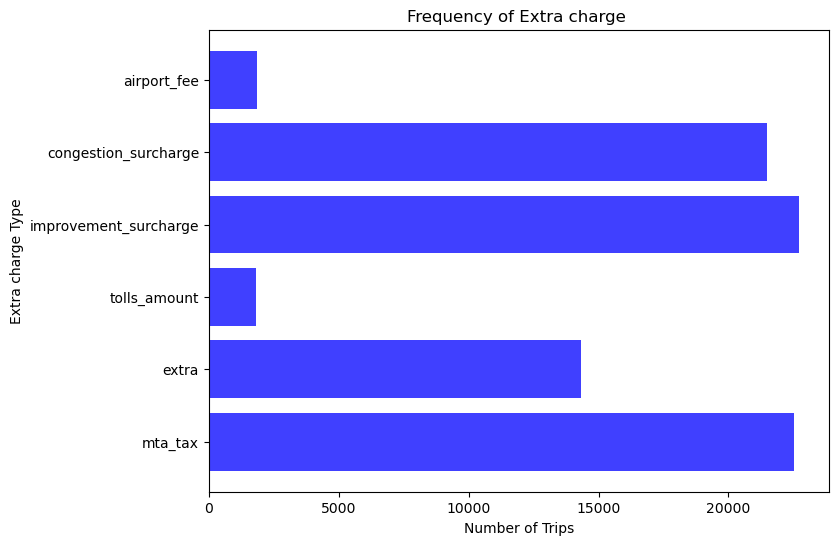

In [24]:
#  Extra chanrges columns
extra_charge_columns = ['mta_tax','extra','tolls_amount','improvement_surcharge','congestion_surcharge','airport_fee']

extra_charge_count = (df[extra_charge_columns] > 0).sum()

extra_charge_df = pd.DataFrame({'Extracharge': extra_charge_count.index, 'Applied Count': extra_charge_count.values})

# Display the DataFrame
print("\nExtra Charge Frequency:")
print(extra_charge_df.to_string(index=False))

# Graph results
plt.figure(figsize=(8, 6))
plt.barh(extra_charge_df["Extracharge"], extra_charge_df["Applied Count"], color='blue', alpha=0.75)
plt.xlabel("Number of Trips")
plt.ylabel("Extra charge Type")
plt.title("Frequency of Extra charge ")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.


Busiest Hours: 18th hour, Thursday and,October months
Less Busiest Hours: 5 AM least number of pickups. 
Monthly revenue trends: 10th Month is having High Revenue.8th Month is having least revenue
Proportion of each quarter’s revenue in the yearly revenue: 2nd Quarter is having highest revenue.3rd Quarter is having less revenue.
Distribution of different payment types: Most of the payments done through Credit card . Remaining Payment types can be ignore.
Correlation : Fare Amount vs Passenger count
0.046
Correlation : Tip Amount vs Trip Distance
0.78
Correlation : Trip Duration vs Fare Amo
Most slowest routes are clinton East ,Time SQ,East village,Little Italy
Busiest hour 18 and number of trips for that hour is 1561.
Weekday  Peek  Hour Traffic is at 18th hour. Weekend Peek  Hour Traffic is at 14th hou.
Night Time Revenue Share: 6.530893538056749
	Day Time Revenue Share: 93.46910646194324For 1 Passenger count,we observed fare Per mile is 10.99
For 5 Passenger count, we observed fare Per mile is 1.4
Average fare per mile by hour:

10th  hour  is  having  highest fare price 19.909822
5th hour is having  least price 5.7466Monday is highest average price  15.968823	Sunday   is the lowest average price    7.87963
VendorID   2 fare_per_mile is  8.140628 VendorID   2 fare_per_mile is  11.806788Vendor-2 price prices are Hugh comparing Vendor1 prices for all  the buckets
0-2 miles cost’s are high comparing 5+ MilesSaturday and Saturday days are having highest passenger counts, Wednesday  is having least passenger count
  Peak hours  9 PM is having highest passenger count   7 AM having less number of passenger count.



60
 

r
unt
0.29


**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [11]:
print('''
      
1. Optimize Fleet Deployment for Rush Hours
Enhance fleet presence between 4 PM - 7 PM to accommodate peak trip demand. Deploy additional taxis in residential zones from 6 AM - 12 PM to serve morning commuters

2. Zonal Ride Distribution
Strategic fleet expansion needed for JFK, Midtown, and Upper East Side South due to elevated demand.
                              Boost taxi presence in East Village during peak late-night hours 
3. Dynamic Pricing
Adjust fares dynamically in response to surging demand during peak periods.
Optimize residential ride pooling to reduce empty seats and provide budget-friendly fares

4. Improve Service Provider Allocation
Optimize vendor selection by using Vendor 2 for short rides with better per-mile returns and Vendor 1 for longer, cost-effective trips.
5. Maximize Revenue and  Tips
Promote single passenger rides to increase fare-per-mile and tipping rates.
6. Minimize Additional Costs Through Optimized Routing
Optimize routes to bypass congestion pricing areas (e.g., Midtown Center).
Streamline airport pickups to reduce wait times and surcharges.
7. Avoid Slow Routes
Redirect vehicles to avoid high-traffic areas using real-time data.
8. Dynamic Pricing
Adjust fares dynamically in response to surging demand during peak periods.
Optimize residential ride pooling to reduce empty seats and provide budget-friendly fares
''')



      
1. Optimize Fleet Deployment for Rush Hours
Enhance fleet presence between 4 PM - 7 PM to accommodate peak trip demand. Deploy additional taxis in residential zones from 6 AM - 12 PM to serve morning commuters

2. Zonal Ride Distribution
Strategic fleet expansion needed for JFK, Midtown, and Upper East Side South due to elevated demand.
                              Boost taxi presence in East Village during peak late-night hours 
3. Dynamic Pricing
Adjust fares dynamically in response to surging demand during peak periods.
Optimize residential ride pooling to reduce empty seats and provide budget-friendly fares

4. Improve Service Provider Allocation
Optimize vendor selection by using Vendor 2 for short rides with better per-mile returns and Vendor 1 for longer, cost-effective trips.
5. Maximize Revenue and  Tips
Promote single passenger rides to increase fare-per-mile and tipping rates.
6. Minimize Additional Costs Through Optimized Routing
Optimize routes to bypass congestio

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [12]:
print(
'''
1.Peak Hour Ride Allocation
Morning Shift (6 AM - 12 PM): Deploy vehicles in Upper East Side North, Midtown Center, and JFK Airport to serve commuters and airport travellers.

Late-Night Coverage (10 PM - 3 AM): Prioritize West Village, and Times Square to support nightlife and late-hour riders. Square/Theatre District to serve nightlife and late travelers.


2. Weekday Vs Weekend Allocation
Weekdays: Focus on business districts such as Midtown Center, Upper East Side South, and Penn Station to accommodate office commuters.

Weekends: Redirect vehicles to entertainment hotspots like Times Square, East Village, and JFK Airport to meet leisure and travel demand.

3. Strategic AirportTransit Hub Deployment
Ensure consistent cab availability at JFK & LaGuardia Airport, focusing on peak arrival times  in early morning and  late evening
Sustain a reliable fleet near Penn Station  and  Grand Central Terminal during commuter-heavy hours in the morning and evening.
4. Key Residential & Business Hotspots
Morning Coverage: Prioritize residential neighbourhoods such as Upper East Side North & South, Murray Hill, and Midtown East to accommodate commuters.
Evening Coverage: Boost cab availability in high-dropoff zones like Midtown Center, Lenox Hill West, and Clinton East.

5. Optimized Late-Night Fleet Allocation
Deploy cabs near nightlife hotspots such as East Village, West Village, to meet late-night demand.

6. Maximize Earnings and Fare Efficiency
Assign Vendor 2 cabs to high-turnover, short-distance areas (0-2 miles) like Midtown Center and Times Square for increased per-mile revenue.
Deploy Vendor 1 cabs for long  trips (5+ miles) from JFK Airport and Upper East Side North to maximize trip efficiency.

7. Minimize Idle Time and  Maximize Utilization
Use real-time data to reallocate idle cabs from low-demand to high-demand areas efficiently.
Dynamically shift vehicles between airports, entertainment districts, and business hubs based on live trip demand.
'''
)    


1.Peak Hour Ride Allocation
Morning Shift (6 AM - 12 PM): Deploy vehicles in Upper East Side North, Midtown Center, and JFK Airport to serve commuters and airport travellers.

Late-Night Coverage (10 PM - 3 AM): Prioritize West Village, and Times Square to support nightlife and late-hour riders. Square/Theatre District to serve nightlife and late travelers.


2. Weekday Vs Weekend Allocation
Weekdays: Focus on business districts such as Midtown Center, Upper East Side South, and Penn Station to accommodate office commuters.

Weekends: Redirect vehicles to entertainment hotspots like Times Square, East Village, and JFK Airport to meet leisure and travel demand.

3. Strategic AirportTransit Hub Deployment
Ensure consistent cab availability at JFK & LaGuardia Airport, focusing on peak arrival times  in early morning and  late evening
Sustain a reliable fleet near Penn Station  and  Grand Central Terminal during commuter-heavy hours in the morning and evening.
4. Key Residential & Busines

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [13]:
print('''

Peak Hour Surge Rate Optimization:
Implement dynamic pricing in nightlife hotspots such as East Village and West Village during late hours.
Adjust fares between 4 PM - 7 PM and 10 PM - 3 AM in high-demand areas like Midtown, Times Square, and airports.

Distance-Based Fare Optimization:

Set premium per-mile rates for short trips (0-2 miles), particularly for Vendor 2, which has higher base pricing.
Offer slightly lower per-mile rates for long trips (5+ miles) to extended rides.

Airport and Transit Hub Premiums:
Implement premium fares for pickups at JFK, LaGuardia, and Penn Station to capitalize on high demand.
Offer discounted return trips to minimize empty return journeys.

Pricing Strategy for Weekdays & Weekends:
increase fares on weekends, particularly in high-demand nightlife areas.
Provide off-peak weekday discounts to boost ridership and fleet efficiency.

''')




Peak Hour Surge Rate Optimization:
Implement dynamic pricing in nightlife hotspots such as East Village and West Village during late hours.
Adjust fares between 4 PM - 7 PM and 10 PM - 3 AM in high-demand areas like Midtown, Times Square, and airports.

Distance-Based Fare Optimization:

Set premium per-mile rates for short trips (0-2 miles), particularly for Vendor 2, which has higher base pricing.
Offer slightly lower per-mile rates for long trips (5+ miles) to extended rides.

Airport and Transit Hub Premiums:
Implement premium fares for pickups at JFK, LaGuardia, and Penn Station to capitalize on high demand.
Offer discounted return trips to minimize empty return journeys.

Pricing Strategy for Weekdays & Weekends:
increase fares on weekends, particularly in high-demand nightlife areas.
Provide off-peak weekday discounts to boost ridership and fleet efficiency.


